# <p style="background-color:#018cb7; font-size:100%; text-align:left; color:#FFFFFF; padding: 15px 5px 15px 25px; border-radius: 15px;">Porto Seguro’s Safe Driver Prediction - Kaggle</p>

## Predict if a driver will file an insurance claim next year

<img src='./img/safe-driving-730x432.jpeg' style='height:400px; border-radius: 5px;'/>

---
# <p style="background-color:#018cb7; font-size:100%; text-align:left; color:#FFFFFF; padding: 15px 5px 15px 25px; border-radius: 15px;">Contents:</p>

* [1. Introduction](#1)
    * [1.1 Data Description](#1.1)
    * [1.2 Libraries](#1.2)
    * [1.3 Loading Dataset](#1.3)
* [2. Feature Engineering](#2)
    * [2.1 SMOTE](#2.1)
    * [2.2 Cross-validation](#2.2)
    * [2.3 Feature Selection](#2.3)
* [3. Models](#3)
    * [3.1 Lightgbm](#3.1)
    * [3.2 Neural Networks](#3.2)
* [4. Evaluation](#4)
* [5. Kaggle Submission](#5)

<a id="1"></a>
# <p style="background-color:#018cb7; font-size:100%; text-align:left; color:#FFFFFF; padding: 15px 5px 15px 25px; border-radius: 15px;">1- Introduction</p>

<img title="Porto Seguro" src="img/porto-seguro-logo-1-3.png" alt="Porto Seguro" style='height:80px; padding: 10px; padding-right: 15px;' align="center"> 

[Porto Seguro](https://www.portoseguro.com.br/en/institutional) is one of the largest insurance companies in Brazil specialized in car and home insurance. Located in São Paulo, Porto Seguro has been one of the leading insurers in Brazil since its foundation in 1945.

A key challenge faced by all major insurers is, when it comes to car insurance, how to address fairness towards good drivers and try not to penalize those who have a good driving history on account of a few bad drivers. Inaccuracies in car insurance claim predictions usually raise its cost for good drivers and reduce the price for bad ones.

Porto Seguro has been applying Machine Learning for more than 20 years and intends to make car insurance more accessible to everyone. Thinking about that, the company created an online competition to help them explore new and more powerful ML methods.

<img title="Porto Seguro" src="img/Kaggle_logo.png" alt="Porto Seguro" style='height:80px; padding: 10px; padding-right: 15px' align="center">

[Kaggle](https://www.kaggle.com/) is an online community of data scientists and allows users to find and publish data sets, explore and build ML models, and enter competitions to solve data science challenges.

In this [competition](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/), the challenge is build a model that predicts the probability that a car insurance policy holder will file a claim next year.

<a id="1.1"></a>
## Data Description

In the train and test data:

- Features that belong to similar groupings are tagged as such in the feature names (e.g., `ind`, `reg`, `car`, `calc`). 
- Feature names include the postfix `bin` to indicate binary features and `cat` to indicate categorical features.
- Features without these designations are either continuous or ordinal.
- Values of `-1` indicate that the feature was missing from the observation. 
- The `target` columns signifies whether or not a claim was filed for that policy holder. 

- `ind` - individuals
- `reg` - regions
- `car` - cars
- `calc` - calculated features

- `_bin` - binary 
- `_cat` - categorical

<a id="1.2"></a>
## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import random

%matplotlib inline
matplotlib.style.use("ggplot")

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
from platform import python_version
print('Python version:', python_version())

Python version: 3.8.5


In [3]:
# !pip install -q -U watermark
%reload_ext watermark
%watermark -a "Leandro Pessini" --iversions

Author: Leandro Pessini

pandas    : 1.1.3
numpy     : 1.19.2
matplotlib: 3.3.2
seaborn   : 0.11.1
plotly    : 4.14.3



<a id="1.3"></a>
## Loading Dataset

In [4]:
# Kaggle
#kaggle_path = "../input/porto-seguro-safe-driver-prediction/"

In [41]:
# Local
local_path = "./data/"

In [42]:
# Loading training dataset and converting missing data value to NaN
#train_df = pd.read_csv('../input/porto-seguro-safe-driver-prediction/train.csv', low_memory=False, na_values= '-1')

In [108]:
train_df = pd.read_csv(local_path + "train.csv").set_index('id')
test_df = pd.read_csv(local_path + "test.csv").set_index('id')

In [99]:
train_df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [100]:
test_df.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [101]:
print('Train Dataset - Number of rows are',train_df.shape[0], 'and number of columns are ',train_df.shape[1])
print('Test Dataset - Number of rows are',test_df.shape[0], 'and number of columns are ',test_df.shape[1])

Train Dataset - Number of rows are 595212 and number of columns are  58
Test Dataset - Number of rows are 892816 and number of columns are  57


<a id="2"></a>
# <p style="background-color:#018cb7; font-size:100%; text-align:left; color:#FFFFFF; padding: 15px 5px 15px 25px; border-radius: 15px;">2- Preprocessing & Feature Engineering</p>

## Metadata

To make data management easier, a meta-info about the variables is added to the DataFrame. It will help handling those variables later on the analysis, data viz and modeling.

- __role__: input, ID, target
- __level__: categorical, interval, ordinal, binary
- __keep__: True or False
- __dtype__: int, float, str

In [47]:
data = []
for f in train_df.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    else:
        role = 'input'
         
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f:
        level = 'categorical'
    elif train_df[f].dtype == float:
        level = 'interval'
    elif train_df[f].dtype == int:
        level = 'ordinal'
        
    # Initialize keep to True for all variables
    keep = True
    
    # Defining the data type 
    dtype = train_df[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [48]:
meta.head()

,role,level,keep,dtype
varname,,,,
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,categorical,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,categorical,True,int64


In [49]:
meta.tail()

,role,level,keep,dtype
varname,,,,
ps_calc_16_bin,input,binary,True,int64
ps_calc_17_bin,input,binary,True,int64
ps_calc_18_bin,input,binary,True,int64
ps_calc_19_bin,input,binary,True,int64
ps_calc_20_bin,input,binary,True,int64


In [50]:
# Example to extract all categorical variables that are not dropped
meta[(meta.level == 'categorical') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

### Number of variables per role and level 

In [51]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,input,binary,17
1,input,categorical,14
2,input,interval,10
3,input,ordinal,16
4,target,binary,1


## Missing values

>Values of `-1` indicate that the feature was missing from the observation.

In [52]:
vars_with_missing = []

for f in train_df.columns:
    missings = train_df[train_df[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train_df.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('\nIn total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 216 records (0.04%) with missing values
Variable ps_ind_04_cat has 83 records (0.01%) with missing values
Variable ps_ind_05_cat has 5809 records (0.98%) with missing values
Variable ps_reg_03 has 107772 records (18.11%) with missing values
Variable ps_car_01_cat has 107 records (0.02%) with missing values
Variable ps_car_02_cat has 5 records (0.00%) with missing values
Variable ps_car_03_cat has 411231 records (69.09%) with missing values
Variable ps_car_05_cat has 266551 records (44.78%) with missing values
Variable ps_car_07_cat has 11489 records (1.93%) with missing values
Variable ps_car_09_cat has 569 records (0.10%) with missing values
Variable ps_car_11 has 5 records (0.00%) with missing values
Variable ps_car_12 has 1 records (0.00%) with missing values
Variable ps_car_14 has 42620 records (7.16%) with missing values

In total, there are 13 variables with missing values


Feature elimination. I dropped all of calc features and ['ps_ind_14','ps_car_10_cat','ps_car_14','ps_ind_10_bin','ps_ind_11_bin',
'ps_ind_12_bin','ps_ind_13_bin','ps_car_11','ps_car_12']. I was excluding them one by one in greedy fashion and checking lgb cross validation score.

---
Only `ps_car_03_cat` and `ps_car_05_cat` have a large number of missing values.
- ps_car_03_cat has 411231 records (69.09%)
- ps_car_05_cat has 266551 records (44.78%)

__I will drop those variables???__

__Add 'number of missing values per data' as a new feature?__
train_df['num_missing'] = (all_data==-1).sum(axis=1)


Add num_missin to remaining_features
remaining_features.append('num_missing')

## Preprocessing / Feature Engineering

In [53]:
from sklearn.preprocessing import OneHotEncoder

train_copy = train_df.copy().replace(-1, np.NaN)

v = meta[(meta.level == 'nominal') & (meta.keep)].index # Nominal features
            
# Apply One-Hot encoding
onehot_encoder = OneHotEncoder(handle_unknown='error')
encoded_cat_matrix = onehot_encoder.fit_transform(train_df[v]) 

In [54]:
encoded_cat_matrix

<595212x0 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

__OneHotEnconder__: Although LightGBM is capable of using "true" categorical variables, to reduce noise while getting the splits for most useful categories I applied OneHotEnconding technique.

Feature elimination. I dropped all of calc features and ['ps_ind_14','ps_car_10_cat','ps_car_14','ps_ind_10_bin','ps_ind_11_bin',
'ps_ind_12_bin','ps_ind_13_bin','ps_car_11','ps_car_12']. I was excluding them one by one in greedy fashion and checking lgb cross validation score.

Hot encoding categorical variables. It helped to reduce noise while getting the splits for most useful categories.

For NN model it was also necessary to hot encode numeric features with small number of unique values - ['ps_car_15','ps_ind_01','ps_ind_03','ps_ind_15','ps_reg_01','ps_reg_02'] (without dropping the original ones)

Regularized models. lgb_par = {'feature_fraction': 0.9, 'min_data_in_leaf': 24, 'lambda_l1':10, 'bagging_fraction': 0.5, 'learning_rate': 0.01, 'num_leaves': 24}

## Checking the cardinality of the categorical variables - Future Work?

### Distinct values - hot enconding
Cardinality refers to the number of different values in a variable. As we will create dummy variables from the categorical variables later on, we need to check whether there are variables with many distinct values. We should handle these variables differently as they would result in many dummy variables

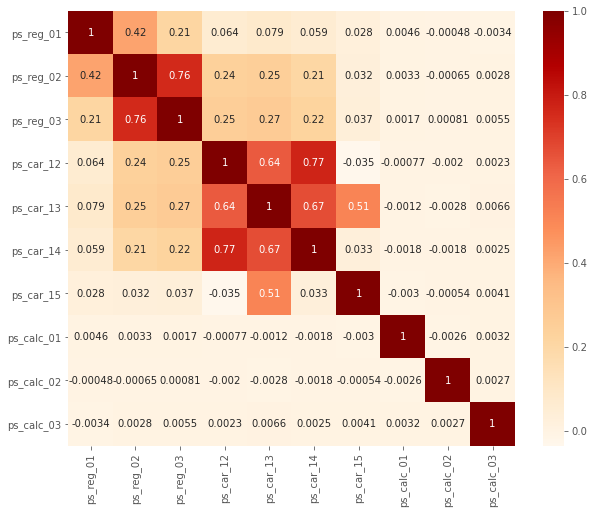

In [55]:
train_copy = train_df.copy().replace(-1, np.NaN)
train_copy = train_copy.dropna()

v = meta[(meta.level == 'interval') & (meta.keep)].index

plt.figure(figsize=(10, 8))
cont_corr = train_copy[v].corr() # Correlation between continuous features
sns.heatmap(cont_corr, annot=True, cmap='OrRd'); # Plot heatmap

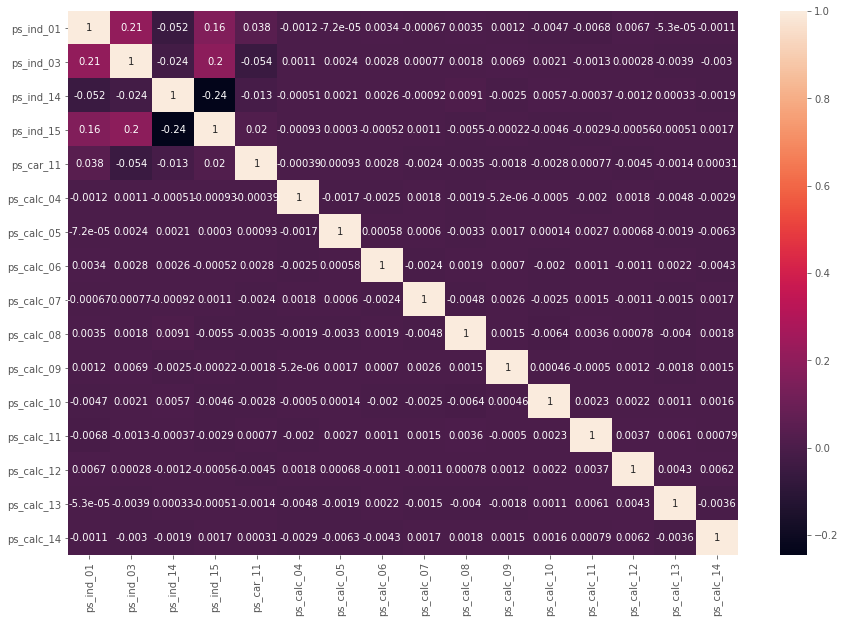

In [56]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index

plt.figure(figsize=(15, 10))
cont_corr = train_copy[v].corr() # Correlation between continuous features
sns.heatmap(cont_corr, annot=True); # Plot heatmap

## Handling imbalanced classes

`target` variable 1 means that a claim was filed and 0 that it was not claimed.

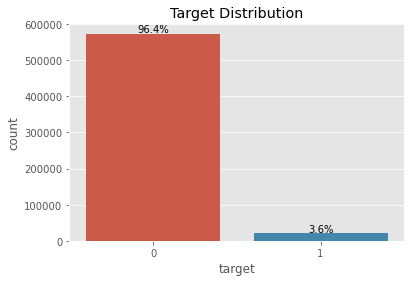

In [57]:
y = train_df.target
ax = sns.countplot(y,label="Count")

total_size = len(train_df)

# Display the target value ratio at the top of the bar
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    left_coord = patch.get_x()
    percent = height/total_size*100

    ax.text(x=left_coord + width/2.0, 
            y=height + 3000,
            s='{:1.1f}%'.format(percent),
            ha='center')

ax.set_title('Target Distribution');

### SMOTE

## Feature Importance

__Reference__
>Raschka, S., & Mirjalili, V. (2019). Python Machine Learning. Zaltbommel, Netherlands: Van Haren Publishing.

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import time
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [64]:
import warnings
warnings.simplefilter('ignore', UserWarning)

In [65]:
categorical_feats = meta[(meta.level == 'categorical') & (meta.keep)].all()

In [66]:
train_copy = train_df.copy()

In [67]:
categorical_feats = [
    f for f in train_copy.columns if train_copy[f].dtype == 'object'
]

categorical_feats
for f_ in categorical_feats:
    train_copy[f_], _ = pd.factorize(train_copy[f_])
    # Set feature type as categorical
    train_copy[f_] = train_copy[f_].astype('category')

In [138]:
lgb_params = {
        'class_weight': 'balanced', # as we have imbalanced class
        'objective': 'binary',
        'boosting_type': 'dart',
        'learning_rate': 0.01,
        'n_estimators': 500,
        'n_jobs': 4, # number of parallel threads
    }
clf = lgb.LGBMClassifier()  
clf.set_params(**lgb_params)

LGBMClassifier(boosting_type='dart', class_weight='balanced',
               learning_rate=0.01, max_depth=9, n_estimators=500, n_jobs=4,
               objective='binary')

In [139]:
y = train_df.target
X = train_df.drop(['target'], inplace=False, axis=1)

X_test = test_df

In [140]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=3, shuffle=True)
predicts = []

for train_index, test_index in kf.split(X, y):
    print("---")
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    clf.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    predicts.append(clf.predict(X_test))

---
[1]	valid_0's binary_logloss: 0.692713
[2]	valid_0's binary_logloss: 0.692292
[3]	valid_0's binary_logloss: 0.691874
[4]	valid_0's binary_logloss: 0.691469
[5]	valid_0's binary_logloss: 0.691067
[6]	valid_0's binary_logloss: 0.690676
[7]	valid_0's binary_logloss: 0.690285
[8]	valid_0's binary_logloss: 0.690418
[9]	valid_0's binary_logloss: 0.69004
[10]	valid_0's binary_logloss: 0.68966
[11]	valid_0's binary_logloss: 0.689295
[12]	valid_0's binary_logloss: 0.689421
[13]	valid_0's binary_logloss: 0.689055
[14]	valid_0's binary_logloss: 0.6887
[15]	valid_0's binary_logloss: 0.688348
[16]	valid_0's binary_logloss: 0.688005
[17]	valid_0's binary_logloss: 0.68766
[18]	valid_0's binary_logloss: 0.687323
[19]	valid_0's binary_logloss: 0.686998
[20]	valid_0's binary_logloss: 0.686671
[21]	valid_0's binary_logloss: 0.686749
[22]	valid_0's binary_logloss: 0.686426
[23]	valid_0's binary_logloss: 0.686111
[24]	valid_0's binary_logloss: 0.6858
[25]	valid_0's binary_logloss: 0.685488
[26]	valid_0

[205]	valid_0's binary_logloss: 0.675369
[206]	valid_0's binary_logloss: 0.675185
[207]	valid_0's binary_logloss: 0.675277
[208]	valid_0's binary_logloss: 0.675113
[209]	valid_0's binary_logloss: 0.675217
[210]	valid_0's binary_logloss: 0.675304
[211]	valid_0's binary_logloss: 0.675393
[212]	valid_0's binary_logloss: 0.675225
[213]	valid_0's binary_logloss: 0.675036
[214]	valid_0's binary_logloss: 0.674878
[215]	valid_0's binary_logloss: 0.674709
[216]	valid_0's binary_logloss: 0.67481
[217]	valid_0's binary_logloss: 0.674634
[218]	valid_0's binary_logloss: 0.674471
[219]	valid_0's binary_logloss: 0.674559
[220]	valid_0's binary_logloss: 0.674393
[221]	valid_0's binary_logloss: 0.674487
[222]	valid_0's binary_logloss: 0.674335
[223]	valid_0's binary_logloss: 0.674177
[224]	valid_0's binary_logloss: 0.674277
[225]	valid_0's binary_logloss: 0.674387
[226]	valid_0's binary_logloss: 0.674475
[227]	valid_0's binary_logloss: 0.674544
[228]	valid_0's binary_logloss: 0.674382
[229]	valid_0's b

[406]	valid_0's binary_logloss: 0.667076
[407]	valid_0's binary_logloss: 0.66698
[408]	valid_0's binary_logloss: 0.667051
[409]	valid_0's binary_logloss: 0.666952
[410]	valid_0's binary_logloss: 0.666855
[411]	valid_0's binary_logloss: 0.666756
[412]	valid_0's binary_logloss: 0.66682
[413]	valid_0's binary_logloss: 0.666889
[414]	valid_0's binary_logloss: 0.666791
[415]	valid_0's binary_logloss: 0.666697
[416]	valid_0's binary_logloss: 0.666603
[417]	valid_0's binary_logloss: 0.666674
[418]	valid_0's binary_logloss: 0.666742
[419]	valid_0's binary_logloss: 0.666646
[420]	valid_0's binary_logloss: 0.666712
[421]	valid_0's binary_logloss: 0.666617
[422]	valid_0's binary_logloss: 0.666515
[423]	valid_0's binary_logloss: 0.666416
[424]	valid_0's binary_logloss: 0.666321
[425]	valid_0's binary_logloss: 0.666389
[426]	valid_0's binary_logloss: 0.666297
[427]	valid_0's binary_logloss: 0.666207
[428]	valid_0's binary_logloss: 0.666276
[429]	valid_0's binary_logloss: 0.666184
[430]	valid_0's bi

[106]	valid_0's binary_logloss: 0.680563
[107]	valid_0's binary_logloss: 0.680679
[108]	valid_0's binary_logloss: 0.680444
[109]	valid_0's binary_logloss: 0.68054
[110]	valid_0's binary_logloss: 0.680652
[111]	valid_0's binary_logloss: 0.680431
[112]	valid_0's binary_logloss: 0.680207
[113]	valid_0's binary_logloss: 0.679976
[114]	valid_0's binary_logloss: 0.67975
[115]	valid_0's binary_logloss: 0.679521
[116]	valid_0's binary_logloss: 0.679306
[117]	valid_0's binary_logloss: 0.679394
[118]	valid_0's binary_logloss: 0.679168
[119]	valid_0's binary_logloss: 0.679264
[120]	valid_0's binary_logloss: 0.679377
[121]	valid_0's binary_logloss: 0.679492
[122]	valid_0's binary_logloss: 0.679606
[123]	valid_0's binary_logloss: 0.679398
[124]	valid_0's binary_logloss: 0.679183
[125]	valid_0's binary_logloss: 0.679274
[126]	valid_0's binary_logloss: 0.679384
[127]	valid_0's binary_logloss: 0.679169
[128]	valid_0's binary_logloss: 0.679265
[129]	valid_0's binary_logloss: 0.679056
[130]	valid_0's bi

[307]	valid_0's binary_logloss: 0.671376
[308]	valid_0's binary_logloss: 0.671253
[309]	valid_0's binary_logloss: 0.671328
[310]	valid_0's binary_logloss: 0.671199
[311]	valid_0's binary_logloss: 0.671068
[312]	valid_0's binary_logloss: 0.670938
[313]	valid_0's binary_logloss: 0.670815
[314]	valid_0's binary_logloss: 0.670885
[315]	valid_0's binary_logloss: 0.670966
[316]	valid_0's binary_logloss: 0.670845
[317]	valid_0's binary_logloss: 0.670707
[318]	valid_0's binary_logloss: 0.670586
[319]	valid_0's binary_logloss: 0.670659
[320]	valid_0's binary_logloss: 0.670536
[321]	valid_0's binary_logloss: 0.670602
[322]	valid_0's binary_logloss: 0.67047
[323]	valid_0's binary_logloss: 0.670341
[324]	valid_0's binary_logloss: 0.670423
[325]	valid_0's binary_logloss: 0.670307
[326]	valid_0's binary_logloss: 0.670388
[327]	valid_0's binary_logloss: 0.670266
[328]	valid_0's binary_logloss: 0.670338
[329]	valid_0's binary_logloss: 0.670208
[330]	valid_0's binary_logloss: 0.670286
[331]	valid_0's b

[5]	valid_0's binary_logloss: 0.691041
[6]	valid_0's binary_logloss: 0.690635
[7]	valid_0's binary_logloss: 0.690244
[8]	valid_0's binary_logloss: 0.690381
[9]	valid_0's binary_logloss: 0.689991
[10]	valid_0's binary_logloss: 0.689606
[11]	valid_0's binary_logloss: 0.689232
[12]	valid_0's binary_logloss: 0.68936
[13]	valid_0's binary_logloss: 0.688986
[14]	valid_0's binary_logloss: 0.688611
[15]	valid_0's binary_logloss: 0.68825
[16]	valid_0's binary_logloss: 0.687893
[17]	valid_0's binary_logloss: 0.687537
[18]	valid_0's binary_logloss: 0.687189
[19]	valid_0's binary_logloss: 0.686847
[20]	valid_0's binary_logloss: 0.686512
[21]	valid_0's binary_logloss: 0.686594
[22]	valid_0's binary_logloss: 0.68626
[23]	valid_0's binary_logloss: 0.685934
[24]	valid_0's binary_logloss: 0.68561
[25]	valid_0's binary_logloss: 0.685297
[26]	valid_0's binary_logloss: 0.684988
[27]	valid_0's binary_logloss: 0.684685
[28]	valid_0's binary_logloss: 0.684794
[29]	valid_0's binary_logloss: 0.68449
[30]	valid

[209]	valid_0's binary_logloss: 0.674775
[210]	valid_0's binary_logloss: 0.674866
[211]	valid_0's binary_logloss: 0.674957
[212]	valid_0's binary_logloss: 0.674783
[213]	valid_0's binary_logloss: 0.674617
[214]	valid_0's binary_logloss: 0.674435
[215]	valid_0's binary_logloss: 0.674265
[216]	valid_0's binary_logloss: 0.674368
[217]	valid_0's binary_logloss: 0.674203
[218]	valid_0's binary_logloss: 0.674015
[219]	valid_0's binary_logloss: 0.674106
[220]	valid_0's binary_logloss: 0.673933
[221]	valid_0's binary_logloss: 0.674031
[222]	valid_0's binary_logloss: 0.673877
[223]	valid_0's binary_logloss: 0.673708
[224]	valid_0's binary_logloss: 0.673814
[225]	valid_0's binary_logloss: 0.673926
[226]	valid_0's binary_logloss: 0.674018
[227]	valid_0's binary_logloss: 0.674088
[228]	valid_0's binary_logloss: 0.67392
[229]	valid_0's binary_logloss: 0.67401
[230]	valid_0's binary_logloss: 0.673846
[231]	valid_0's binary_logloss: 0.673684
[232]	valid_0's binary_logloss: 0.673516
[233]	valid_0's bi

[412]	valid_0's binary_logloss: 0.666172
[413]	valid_0's binary_logloss: 0.666243
[414]	valid_0's binary_logloss: 0.666143
[415]	valid_0's binary_logloss: 0.666041
[416]	valid_0's binary_logloss: 0.665943
[417]	valid_0's binary_logloss: 0.666017
[418]	valid_0's binary_logloss: 0.666088
[419]	valid_0's binary_logloss: 0.66599
[420]	valid_0's binary_logloss: 0.666059
[421]	valid_0's binary_logloss: 0.66596
[422]	valid_0's binary_logloss: 0.665865
[423]	valid_0's binary_logloss: 0.665766
[424]	valid_0's binary_logloss: 0.665672
[425]	valid_0's binary_logloss: 0.665743
[426]	valid_0's binary_logloss: 0.66565
[427]	valid_0's binary_logloss: 0.66555
[428]	valid_0's binary_logloss: 0.66562
[429]	valid_0's binary_logloss: 0.665526
[430]	valid_0's binary_logloss: 0.665589
[431]	valid_0's binary_logloss: 0.665494
[432]	valid_0's binary_logloss: 0.665405
[433]	valid_0's binary_logloss: 0.66531
[434]	valid_0's binary_logloss: 0.665377
[435]	valid_0's binary_logloss: 0.66544
[436]	valid_0's binary_

[114]	valid_0's binary_logloss: 0.67969
[115]	valid_0's binary_logloss: 0.679469
[116]	valid_0's binary_logloss: 0.679237
[117]	valid_0's binary_logloss: 0.679324
[118]	valid_0's binary_logloss: 0.679108
[119]	valid_0's binary_logloss: 0.679205
[120]	valid_0's binary_logloss: 0.67932
[121]	valid_0's binary_logloss: 0.679432
[122]	valid_0's binary_logloss: 0.679545
[123]	valid_0's binary_logloss: 0.679331
[124]	valid_0's binary_logloss: 0.679123
[125]	valid_0's binary_logloss: 0.679213
[126]	valid_0's binary_logloss: 0.67932
[127]	valid_0's binary_logloss: 0.679102
[128]	valid_0's binary_logloss: 0.679196
[129]	valid_0's binary_logloss: 0.67899
[130]	valid_0's binary_logloss: 0.678757
[131]	valid_0's binary_logloss: 0.678846
[132]	valid_0's binary_logloss: 0.678637
[133]	valid_0's binary_logloss: 0.678426
[134]	valid_0's binary_logloss: 0.678532
[135]	valid_0's binary_logloss: 0.678304
[136]	valid_0's binary_logloss: 0.678427
[137]	valid_0's binary_logloss: 0.678525
[138]	valid_0's bina

[315]	valid_0's binary_logloss: 0.670548
[316]	valid_0's binary_logloss: 0.670424
[317]	valid_0's binary_logloss: 0.670289
[318]	valid_0's binary_logloss: 0.670165
[319]	valid_0's binary_logloss: 0.67024
[320]	valid_0's binary_logloss: 0.670111
[321]	valid_0's binary_logloss: 0.670179
[322]	valid_0's binary_logloss: 0.670047
[323]	valid_0's binary_logloss: 0.669914
[324]	valid_0's binary_logloss: 0.669999
[325]	valid_0's binary_logloss: 0.669881
[326]	valid_0's binary_logloss: 0.669965
[327]	valid_0's binary_logloss: 0.669835
[328]	valid_0's binary_logloss: 0.669909
[329]	valid_0's binary_logloss: 0.669792
[330]	valid_0's binary_logloss: 0.669873
[331]	valid_0's binary_logloss: 0.669952
[332]	valid_0's binary_logloss: 0.670026
[333]	valid_0's binary_logloss: 0.670106
[334]	valid_0's binary_logloss: 0.670189
[335]	valid_0's binary_logloss: 0.670062
[336]	valid_0's binary_logloss: 0.670141
[337]	valid_0's binary_logloss: 0.67001
[338]	valid_0's binary_logloss: 0.669896
[339]	valid_0's bi

[17]	valid_0's binary_logloss: 0.687582
[18]	valid_0's binary_logloss: 0.687245
[19]	valid_0's binary_logloss: 0.686912
[20]	valid_0's binary_logloss: 0.686583
[21]	valid_0's binary_logloss: 0.686666
[22]	valid_0's binary_logloss: 0.686345
[23]	valid_0's binary_logloss: 0.686025
[24]	valid_0's binary_logloss: 0.68571
[25]	valid_0's binary_logloss: 0.685399
[26]	valid_0's binary_logloss: 0.685074
[27]	valid_0's binary_logloss: 0.684774
[28]	valid_0's binary_logloss: 0.684883
[29]	valid_0's binary_logloss: 0.684577
[30]	valid_0's binary_logloss: 0.684265
[31]	valid_0's binary_logloss: 0.684277
[32]	valid_0's binary_logloss: 0.683987
[33]	valid_0's binary_logloss: 0.6837
[34]	valid_0's binary_logloss: 0.683401
[35]	valid_0's binary_logloss: 0.683539
[36]	valid_0's binary_logloss: 0.683741
[37]	valid_0's binary_logloss: 0.683452
[38]	valid_0's binary_logloss: 0.683166
[39]	valid_0's binary_logloss: 0.682894
[40]	valid_0's binary_logloss: 0.682813
[41]	valid_0's binary_logloss: 0.682965
[42

[221]	valid_0's binary_logloss: 0.673951
[222]	valid_0's binary_logloss: 0.67379
[223]	valid_0's binary_logloss: 0.673622
[224]	valid_0's binary_logloss: 0.673726
[225]	valid_0's binary_logloss: 0.67384
[226]	valid_0's binary_logloss: 0.673932
[227]	valid_0's binary_logloss: 0.674004
[228]	valid_0's binary_logloss: 0.673836
[229]	valid_0's binary_logloss: 0.673926
[230]	valid_0's binary_logloss: 0.67375
[231]	valid_0's binary_logloss: 0.673586
[232]	valid_0's binary_logloss: 0.673425
[233]	valid_0's binary_logloss: 0.673513
[234]	valid_0's binary_logloss: 0.673334
[235]	valid_0's binary_logloss: 0.673424
[236]	valid_0's binary_logloss: 0.673268
[237]	valid_0's binary_logloss: 0.673094
[238]	valid_0's binary_logloss: 0.672943
[239]	valid_0's binary_logloss: 0.672781
[240]	valid_0's binary_logloss: 0.672619
[241]	valid_0's binary_logloss: 0.672722
[242]	valid_0's binary_logloss: 0.672551
[243]	valid_0's binary_logloss: 0.672655
[244]	valid_0's binary_logloss: 0.672746
[245]	valid_0's bin

[423]	valid_0's binary_logloss: 0.665721
[424]	valid_0's binary_logloss: 0.665623
[425]	valid_0's binary_logloss: 0.665693
[426]	valid_0's binary_logloss: 0.665598
[427]	valid_0's binary_logloss: 0.665503
[428]	valid_0's binary_logloss: 0.665574
[429]	valid_0's binary_logloss: 0.665483
[430]	valid_0's binary_logloss: 0.665546
[431]	valid_0's binary_logloss: 0.665462
[432]	valid_0's binary_logloss: 0.665364
[433]	valid_0's binary_logloss: 0.665267
[434]	valid_0's binary_logloss: 0.665334
[435]	valid_0's binary_logloss: 0.665398
[436]	valid_0's binary_logloss: 0.665309
[437]	valid_0's binary_logloss: 0.665222
[438]	valid_0's binary_logloss: 0.665282
[439]	valid_0's binary_logloss: 0.665345
[440]	valid_0's binary_logloss: 0.665242
[441]	valid_0's binary_logloss: 0.665155
[442]	valid_0's binary_logloss: 0.665061
[443]	valid_0's binary_logloss: 0.665123
[444]	valid_0's binary_logloss: 0.665024
[445]	valid_0's binary_logloss: 0.664932
[446]	valid_0's binary_logloss: 0.664995
[447]	valid_0's 

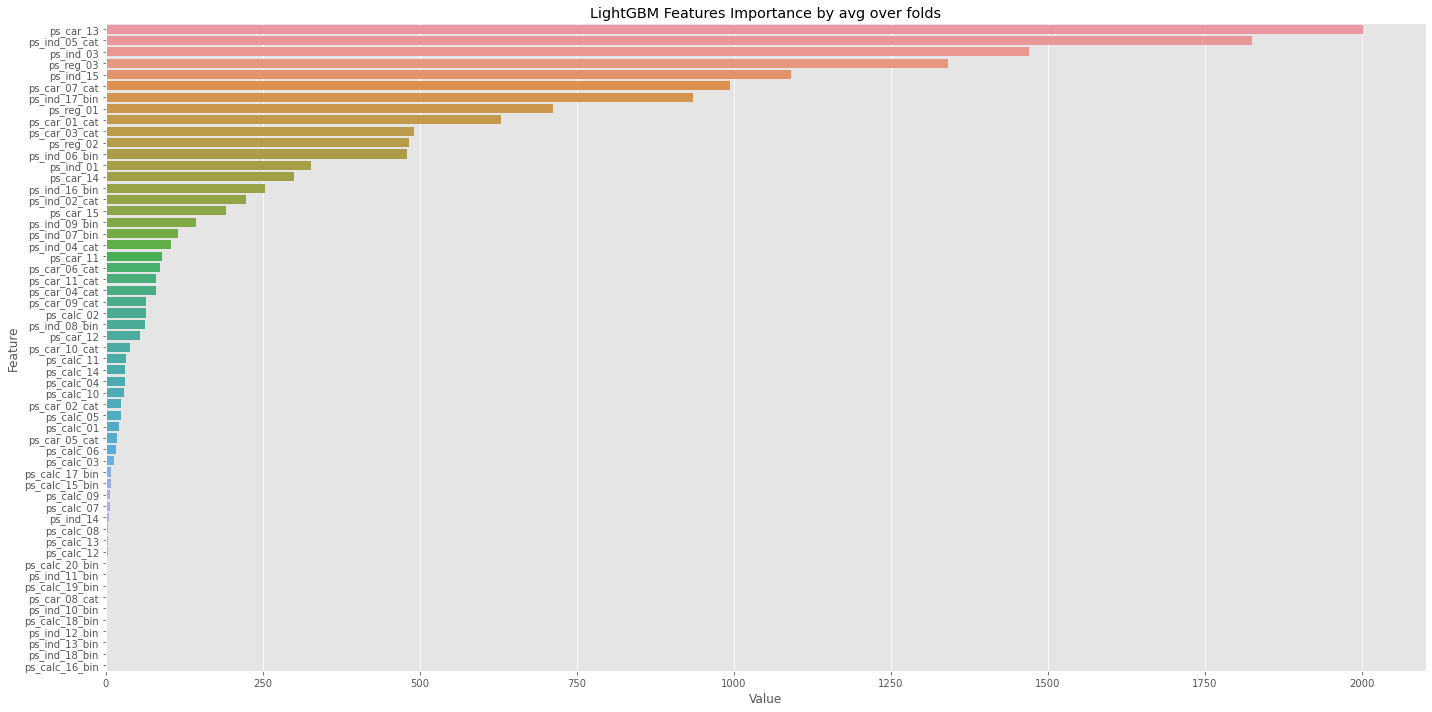

In [151]:
#Plotting features importances

feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X.columns)), columns=['Value','Feature'])

fig = plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features Importance by avg over folds')
plt.savefig('./plots/lgbm_importances-01.png', dpi=fig.dpi)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(train_df.drop(['target'], axis=1))

---

__SelectFromModel__ - Meta-transformer for selecting features based on importance weights.

With the get_support method we can then limit the number of variables in the train data.

>https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [147]:
from sklearn.feature_selection import SelectFromModel
#sfm = SelectFromModel(model, threshold=0.15, prefit=True)
sfm = SelectFromModel(clf, threshold='median', prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 57
Number of features after selection: 29


In [148]:
train = train_df[selected_vars + ['target']]

In [149]:
train.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_15,...,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_02,target
id,,,,,,,,,,,,,,,,,,,,,
7,2,2,5,1,0,0,1,0,0,11,...,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.5,0
9,1,1,7,0,0,0,0,1,0,3,...,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.1,0
13,5,4,9,1,0,0,0,1,0,12,...,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.7,0
16,0,1,2,0,0,1,0,0,0,8,...,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.9,0
17,0,2,0,1,0,1,0,0,0,9,...,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.6,0


<a id="3"></a>
# <p style="background-color:#018cb7; font-size:100%; text-align:left; color:#FFFFFF; padding: 15px 5px 15px 25px; border-radius: 15px;">3- Models</p>

For this project I will use 2 Ensemble ML models: `LightGBM` and `XGBoost`

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

## Tuning the hyper-parameters

- Random Search for Hyper-Parameter Optimization
- Grid search
- Bayesian optimization

<a id="4"></a>
# <p style="background-color:#018cb7; font-size:100%; text-align:left; color:#FFFFFF; padding: 15px 5px 15px 25px; border-radius: 15px;">4- Evaluation</p>

## Normalized Gini coefficient

$$ 
Gini = 2 * AUC - 1
$$

As for why use this instead of the commonly used AUC, the only reason I can think of is that a random prediction will yield a Gini score of 0 as opposed to the AUC which will be 0.5.

Besides that using the gini coefficient sets the performance of a random classifier to a score of 0... the normalization "improves" the other end of the scale and makes that the score of a perfect classifier is equal to 1 rather than a maximum achievable AUC<1. The improvement being only relative depending on whether you think a more intuitive scale is good or not. Although beyond this easier interpretation you might argue that it (the normalization) also improves generalization and comparison of different data-sets.

__Reference:__

> Hand, D. J., & Till, R. J. (2001). A Simple Generalisation of the Area Under the ROC Curve for Multiple Class Classification Problems. Machine Learning, 45(2), 171–186. https://doi.org/10.1023/a:1010920819831

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, roc_auc_score

In [ ]:
def gini_normalized(y_actual, y_pred):
    """Simple normalized Gini based on Scikit-Learn's roc_auc_score"""
    gini = lambda a, p: 2 * roc_auc_score(a, p) - 1
    return gini(y_actual, y_pred) / gini(y_actual, y_actual)

It turned out that the culprit was how Scikit-Learn scored the hold-out set. By default, it predicts using the predict method on the model rather than the predict_proba method. The output from predict on a classification problem is the class labels while the output from predict_proba is the probabilities for the class labels. For computing the Gini value on the results, the output of predict_proba is more appropriate.

To ensure this happens, we modify the `gini_normalized` function to allow that.

In [ ]:
def gini_normalized(y_actual, y_pred):
    """Simple normalized Gini based on Scikit-Learn's roc_auc_score"""
    
    # If the predictions y_pred are binary class probabilities
    if y_pred.ndim == 2:
        if y_pred.shape[1] == 2:
            y_pred = y_pred[:, 1]
    gini = lambda a, p: 2 * roc_auc_score(a, p) - 1
    return gini(y_actual, y_pred) / gini(y_actual, y_actual)

<a id="5"></a>
# <p style="background-color:#018cb7; font-size:100%; text-align:left; color:#FFFFFF; padding: 15px 5px 15px 25px; border-radius: 15px;">5- Kaggle Submission</p>